The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University


# Chapter 5-6 로지스틱 회귀 뉴론으로 단일층 신경망 만들기

    5.1 퍼셉트론
    5.2 시그모이드 함수
    5.3 로지스틱 손실함수
    5.4 이진 분류를 위한 데이터셋 준비
    5.5 로지스틱 회귀 뉴론 만들기
    5.6 로지스틱 회귀 뉴론으로 단일층 신경망 만들기
    5.7 사이킷런의 로지스틱 회귀

사실상 우리는 LogisticNeuron 클래스로 단일층 신경망(Single layer neural network)을 이미 구현했습니다. 그러나 지금까지는 층(layer) 개념을 사용하지 않았습니다. 이제 신경망과 관련한 개념을 정리할 때가 되었습니다. 여기서 이제 신경망 알고리즘의 개념을 도입합니다. 


## 1. 일반적인 신경망의 구조

일반적으로 신경망은 다음과 같이 표현됩니다. 그림에서 가장 왼쪽이 입력층(input layer), 가장 오른쪽이 출력층(output layer) 그리고 가운데 층들을 은닉층(hidden layer)이라고 부릅니다. 은닉층과 출력층 뉴론들의 오른쪽에 작은 원으로 표시된 활성화 함수는 은닉층과 출력층의 한 부분으로 간주됩니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-network1.png?raw=true" width=300></img>
<center> 그림 1: 일반적인 간단한 인공 신경망의 구조 </center>


#### 단일층 신경망의 모습

앞에서 구현한 LogisticNeuron은 은닉층이 없는 신경망이라 볼 수 있습니다. 입력층과 출력층만 가지는 신경망을 단일층 신경망이라고 부릅니다. 사실 입력층은 입력 그 자체여서 프로그램을 구현할 때는 겉으로 드러나지 않습니다. 이런 표현 방식이 처음에는 이해하지 힘들지만 관습이라고 생각하고 넘어갑니다. 다음은 단일층 신경망을 그림으로 나타낸 것입니다. 이미 로지스틱 회귀를 공부하면서 전체 구성 요소에 대해 공부했으므로 형태만 눈에 익히면 됩니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-network2.png?raw=true" width=300></img>
<center> 그림 2: 단일층 인공 신경망의 구조 </center>

## 2. 단일층 신경망에 유용한 기능 더하기 

앞에서 구현한 LogiticNeuron 클래스가 이미 단일층 신경망이므로 더 이상 구현할 것은 없습니다. 다만, 몇 가지 유용한 기능을 추가하고자 합니다. 예를 들어, 선형 회귀나 로지스틱 회귀는 모두 경사 하강법을 사용했습니다. 경사 하강법은 손실 함수(제곱 오차 손실 함수, 로지스틱 손실 함수)들의 결괏값을 최소화하는 방향으로 가중치를 조정한 것을 기억하죠?  만약 손실 함수의 결과값이 줄어들지 않는다면 뭔가 잘못된 것이니 그 값을 관찰해 보아야 합니다. 여기서는 이런 여러 기능들을 추가할 것입니다. LogisticNeuron 클래스를 복사여 이름을 SingleLayer로 바꾼 후 코드를 작성하는 것이 좋겠습니다. 

#### 1. 손실 함수의 결괏값 저장 기능 추가하기

`__init__()`메소드에 손실 함수의 결괏값을 저장할 리스트 self.losses를 만듭니다. 그런 다음 샘플마다 손실 함수를 계산하고 그 결괏값을 모두 더한 다음 샘플 개수로 나눈 평균값을 self.losses변수에 저장합니다.  그리고, self.activation() 메소드로 계산한 a는 np.log()의 계산을 위해 한 번 더 조정합니다. 왜냐하면 a가 0에 가까워지면 np.log()함수의 값은 음의 무한대가 되고 a가 1에 가까워지면 np.log()함수의 값은 0이 되기 때문입니다. 손실값이 무한해지면 정확한 계산을 할 수 없으므로 a의 값이 $1 \times 10^{-10}$부터 $1 - 1\times 10^{-10}$ 사이가 되도록 np.clip()함수로 조정해야 합니다. np.clip()함수는 주어진 범위 밖의 값을 범위 양 끝의 값으로 잘라 냅니다. 

In [ ]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient를 계산함
        b_grad = 1 * err        # 편향에 대한 gradient를 계산함
        return w_grad, b_grad 

    def activation(self, z):
        z = np.clip(z, -500, 500)       # 오버플로우 방지를 위해
        return 1 / (1 + np.exp(-z)) 

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])        # 가중치 초기화 
        self.b = 0                          # 편향 초기화
        for i in range(epochs):             # epochs만큰 반복하기
            loss = 0
            indices = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indices:               # 모든 샘플에 대해 반복하기
                z = self.forpass(x[i])       # 순방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad            # 가중치 조정
                self.b -= b_grad            # 편향 조정
                # 안전한 log계산을 위해 클리핑한 후 손실을 누적합니다. 
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) # 에포크마다 평균 손실을 저장

## 3. 여러 가지 경사 하강법에 대해 알아보기

지금까지 사용한 경사하강법은 샘플 데이터 1개에 대한 그래디언트르 계산했습니다. 이를 확률적 경사하강법(stochastic gradient descent)라고 부릅니다. 그런데 전체 훈련셋을 사용하여 한 번에 그래디언트를 계산한 배치 경사 하강법(batch gradient descent)과 배치(batch) 크기를 작게 하여 (훈련셋을 여러 번 나누어) 처리하는 방식인 미니배치 경사 하강법(mini-batch gradient descent)방식이 있습니다. 

확률적 경사 하강법은 샘플 데이터 한 개마다 그래디언트를 계산하여 가중치를 조정하므로 계산 비용은 적은 대신 가중치가 최적값에 수렴하는 과정이 불안정합니다. 반면에 배치 경사 하강법은 전체 훈련 데이터셋를 사용하여 한 번에 그래디언트를 계산하므로 가중치가 최적값에 수렴하는 과정은 안정적이지만 그만큼 계산 비용이 많이 듭니다. 

바로 이들의 장점을 절충한 것이 미니 배치 경사 하강법입니다. 다음은 확률적 경사 하강법, 배치 경사 하강법이 최적의 가중치에 수렴하는 과정을 나타낸 그래프입니다. 미니 배치 경사 하강법은 확률적 경사 하강법보다는 매끄럽게 배치 경사 하강법보다는 덜 매끄럽게 그래프가 그려집니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/grradientPath.png?raw=true" width=500></img>
<center> 그림 3: 확률적 경사하강법, 배치 경사 하강법, 미니 배치 경사하강법의 수렴 과정 비교 </center>

#### 매 에포크마다 훈련셋의 샘플 순서를 섞어서 사용하기 

모든 경사하강법들은 매 에프크마다 훈련셋의 샘플 순서를 섞어 가중치의 최적값을 계산해야 합니다. 훈련셋이 샘플 순서를 섞으면 가중치 최적값의 탐색 과정이 다양해져 가중치 최적값을 제대로 찾을 수 있기 때문입니다. 예를 들어 첫 번째 에포크에서 사용한 샘플의 순서가 1, 3, 2이라면 두 번째 에포크에서는 3, 2, 1이 될 수도 있습니다. 훈련셋의 샘플 순서를 섞는 전형적인 방법은 넘파이 배열의 인덱스를 섞은 후, 인덱스 순서대로 샘플을 뽑는 것입니다. 쉽게 말해 번호표를 따로 섞은 다음 번호표 순서대로 훈련셋을 나열하는 것이죠. 이 방법이 훈련셋 자체를 섞는 것보다 효율적이고 빠릅니다. np.random.permutation()함수를 사용하면 이 방법을 구현할 수 있습니다. 

위의 코드 fit() 메소드에서 두 번째 for문을 보면 indices배열을 이용합니다. indices배열에 [6, 2, 9, ...]와 같은 무작위 번호표가 들어있다고 생각하면 됩니다. 

#### score() 메소드 추가하기

마지막으로 정확도를 계산해 주는 score()메소드를 추가하고 predict() 메소드도 조금 수정하겠습니다. score()메소드는 정확도를 직접 계산할 때 사용했던 np.mean() 함수를 사용합니다. 


In [ ]:
def predict(self, x):
    z = [ self.forpass(x_i) for x_i in x  ]    # 순방향 계산 for all x 
    return np.array(z) > 0               # convert it to list and z > 0     

def score(self, x, y):                       # 정확도 계산 
    return np.mean(self.predict(x) == y)

시그모이드 함수의 출력값은 0 ~ 1사이의 확률값이고 양성 클래스를 판단하는 기준은 0.5이상입니다. 그런데, z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 z가 0보다 작으면 시그모이드 함수의 출력값은 0.5보다 작습니다. 그래서 predict() 메소드에는 굳이 시그모이드 함수를 사용하지 않아도 됩니다. z가 0보다 큰지, 작은지만 따지면 되기 때문입니다. 그래서 predict() 메소드에는 로지스틱 함수를 적용하지 않고 z값의 크기만 비교하여 결과를 반환했습니다. 

이제 단일층 신경망 클래스가 완성되었습니다. 전체 코드는 다음과 같습니다. 이 클래스를 위스콘신 유방암 데이터셋에 적용하는 일만 남았습니다. 

In [6]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err        # 가중치에 대한 gradient를 계산함
        b_grad = 1 * err        # 편향에 대한 gradient를 계산함
        return w_grad, b_grad 

    def activation(self, z):
        z = np.clip(z, -500, 500)       # 오버플로우 방지를 위해
        return 1 / (1 + np.exp(-z)) 

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])        # 가중치 초기화 
        self.b = 0                          # 편향 초기화
        for i in range(epochs):             # epochs만큰 반복하기
            loss = 0
            # indices = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in np.arange(len(x)):     # 모든 샘플에 대해 반복하기
                z = self.forpass(x[i])       # 순방향 계산
                a = self.activation(z)      # 활성화 함수 적용
                err = -(y[i] - a)            # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad            # 가중치 조정
                self.b -= b_grad            # 편향 조정
                # 안전한 log계산을 위해 클리핑한 후 손실을 누적합니다. 
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)) # 에포크마다 평균 손실을 저장

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 순방향 계산
        return np.array(z) > 0

    def score(self, x, y): 
        return np.mean(self.predict(x) == y)

## 4. 단일층 신경망 훈련하기

#### 1. 단일층 신경망 훈련하고 정확도 출력하기

SingleLayer 객체를 만들고 훈련셋(x_train, y_train)로 이 신경망을 훈련한 다음 score() 메소드로 정확도를 출력해 보겠습니다. 

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

layer = SingleLayer()
layer.fit(x_train, y_train, epochs = 500)
layer.score(x_test, y_test)

0.8157894736842105

정확도가 훨씬 좋아졌죠? 아닌가요? 여러 번 반복을 해서 0.947이상 나올 때까지 실행해보길 바랍니다. 이때, SingleLayer 클래스를 다시 실행해야 합니다. 왜 그럴까요? 

LogisticNeuron과 마찬가지로 fit()메소드 에포크 매개변수의 기본값 100을 그대로 사용했는데도 이렇게 성능이 좋아진 이유는 무엇일까요? 에포크마다 훈련셋을 무작위로 섞어 손실 함수의 값을 줄였기 때문입니다. 

#### 2. 손실 함수 누적합 확인하기 

정말 그런지 손실 함수의 값을 확인해 볼까요? layer객체의 losses속성에 손실 함수의 결과값을 저장해 두었으므로, 이 값을 그래프로 그려 확인해 보겠습니다. 

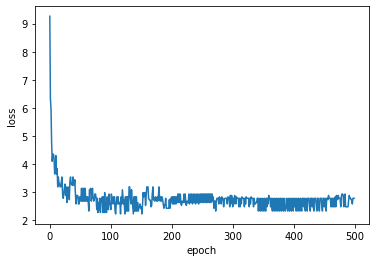

In [8]:
import matplotlib.pyplot as plt
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

그래프로를 그려보니 로지스틱 손실 함수의 값이 에포크가 진행됨에 따라 감소하고 있음을 확인할 수 있습니다. 축하합니다. 
성공적으로 가장 기초적인 신경망 알고리즘을 구현한 것입니다.  이 절에서 배운 것처럼 신경망 알고리즘은 로지스틱 회귀 알고리즘을 확장한 네트워크로 생각해도 좋습니다. 아직까지는 은닉층 사용하지 않았기 때문에 이 단일층 신경망으 로지스틱 회귀나 퍼셉트론 알고리즘과 매우 비슷합니다. 

지금까지는 선형 회귀, 로지스틱 회귀 등 신경망 알고리즘들을 직접 구현하였습니다. 하지만 사이킷런에는 이런 알고리즘들이 미리 구현되어 있습니다 사이킷런에 있는 SGDClassifier클래스를 사용해보도록 합니다. 

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16